In [64]:
import pandas as pd
import numpy as np
import animal_data as ad
import df_utils
from animal_data import AnimalData
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# from load_data.py
animal_data = AnimalData.from_csv('../data/test.csv')

# Get data for a specific cell
print(animal_data.get_data_for_cell('C000', 10))

# Get data for all cells at a specific timestamp
print(animal_data.get_data_at_time(1650475072.560337))


[(1650475072.560337, 0.2281846), (1650475072.660348, 1.662766), (1650475072.760359, -0.05668952), (1650475072.86037, 0.9681355), (1650475072.960381, 2.034298), (1650475073.060392, 2.497762), (1650475073.160403, 3.335557), (1650475073.260414, 2.472625), (1650475073.360425, 2.37616), (1650475073.460436, 2.112702)]
{'C000': (1650475072.560337, 0.2281846), 'C001': (1650475072.560337, 4.353837), 'C002': (1650475072.560337, -8.42196)}


In [4]:
ani1_data = AnimalData.from_csv('../data/4659_day_2.csv')
ani2_data = AnimalData.from_csv('../data/4807_day_2.csv')

In [4]:
print(ani1_data.cell_data.keys())

dict_keys(['C000', 'C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010', 'C011', 'C012', 'C013', 'C014', 'C015', 'C016', 'C017', 'C018', 'C019', 'C020', 'C021', 'C022', 'C023', 'C024', 'C025', 'C026', 'C027', 'C028', 'C029', 'C030', 'C031', 'C032', 'C033', 'C034', 'C035', 'C036', 'C037', 'C038', 'C039', 'C040', 'C041', 'C042', 'C043', 'C044', 'C045', 'C046', 'C047', 'C048', 'C049', 'C050', 'C051', 'C052', 'C053', 'C054', 'C055', 'C056', 'C057', 'C058', 'C059', 'C060', 'C061', 'C062', 'C063', 'C064', 'C065', 'C066', 'C067', 'C068', 'C069', 'C070', 'C071', 'C072', 'C073', 'C074', 'C075', 'C076', 'C077', 'C078', 'C079', 'C080', 'C081', 'C082', 'C083', 'C084', 'C085', 'C086', 'C087', 'C088', 'C089', 'C090', 'C091', 'C092', 'C093', 'C094', 'C095', 'C096', 'C097', 'C098', 'C099', 'C100', 'C101', 'C102', 'C103', 'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119', 'C120', 'C121', 'C122', 'C123

In [6]:
# from normalize_data.py
def normalize_df(ani_data):
    """
    Normalizes cell df/f data by dividing each cell column
    by the max value in each column so that each cells max
    value in the normalized df is 1.
    Arg: ani_data- data from session in AnimalData 
         class structure
    Returns: dfn, a dataframe of normalized data
    """
    #cells = ani_data.cell_data.keys()
    cells = ['C000', 'C001', 'C002', 'C003', 'C004', 'C005', 'C006',
             'C007', 'C008', 'C009', 'C010', 'C011', 'C012', 'C013', 
             'C014', 'C015', 'C016', 'C017', 'C018', 'C019']
    df = df_utils.animal_data_to_df(ani_data, cells)
    m = np.max(df)
    dfn= pd.DataFrame()
    cols = df.columns
    for i in range (len(cols)):
        dfn[cols[i]] = (df[cols[i]]/m[i])
    return dfn

In [7]:
ani1_dfn = normalize_df(ani1_data)
ani2_dfn = normalize_df(ani2_data)

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [8]:
ani1_dfn.head()

,C000,C001,C002,C003,C004,C005,C006,C007,C008,C009,C010,C011,C012,C013,C014,C015,C016,C017,C018,C019
0,-0.019619,0.025452,-0.003827,0.027321,0.112102,0.046354,0.093651,-0.026775,0.075752,-0.028470,0.045625,-0.037437,0.040003,0.194330,-0.055425,0.038851,0.075975,0.033097,0.040894,0.035557
1,-0.006249,-0.011713,-0.021809,0.041709,0.108942,0.106324,0.266927,0.022442,0.028150,-0.018280,-0.001506,-0.062337,0.088463,0.151985,-0.055609,-0.007218,0.002382,0.082305,0.064122,0.063003
2,0.058096,-0.062857,-0.044368,-0.012323,0.110605,0.054975,0.183600,0.003538,0.020860,0.016414,0.017305,0.035261,0.044288,0.104791,-0.055785,0.034080,-0.034949,0.045340,0.054643,0.035716
3,0.034098,0.019470,-0.057691,0.064965,0.115416,0.084718,0.006447,0.015946,0.023418,0.006268,0.007210,-0.090983,0.080712,0.106022,-0.055952,0.020529,-0.066127,-0.073586,0.083909,0.058510
4,-0.045305,-0.003151,-0.069333,-0.007714,0.150137,0.026318,0.057356,0.031135,-0.032563,0.056782,0.014759,-0.112355,0.050122,0.165545,-0.056111,0.113973,0.000178,0.089067,0.086621,0.027908


In [9]:
ani1_dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12401 entries, 0 to 12400
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C000    12401 non-null  float64
 1   C001    12401 non-null  float64
 2   C002    12401 non-null  float64
 3   C003    12401 non-null  float64
 4   C004    12401 non-null  float64
 5   C005    12401 non-null  float64
 6   C006    12401 non-null  float64
 7   C007    12401 non-null  float64
 8   C008    12401 non-null  float64
 9   C009    12401 non-null  float64
 10  C010    12401 non-null  float64
 11  C011    12401 non-null  float64
 12  C012    12401 non-null  float64
 13  C013    12401 non-null  float64
 14  C014    12401 non-null  float64
 15  C015    12401 non-null  float64
 16  C016    12401 non-null  float64
 17  C017    12401 non-null  float64
 18  C018    12401 non-null  float64
 19  C019    12401 non-null  float64
dtypes: float64(20)
memory usage: 1.9 MB


In [10]:
ani2_dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12538 entries, 0 to 12537
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C000    12538 non-null  float64
 1   C001    12538 non-null  float64
 2   C002    12538 non-null  float64
 3   C003    12538 non-null  float64
 4   C004    12538 non-null  float64
 5   C005    12538 non-null  float64
 6   C006    12538 non-null  float64
 7   C007    12538 non-null  float64
 8   C008    12538 non-null  float64
 9   C009    12538 non-null  float64
 10  C010    12538 non-null  float64
 11  C011    12538 non-null  float64
 12  C012    12538 non-null  float64
 13  C013    12538 non-null  float64
 14  C014    12538 non-null  float64
 15  C015    12538 non-null  float64
 16  C016    12538 non-null  float64
 17  C017    12538 non-null  float64
 18  C018    12538 non-null  float64
 19  C019    12538 non-null  float64
dtypes: float64(20)
memory usage: 1.9 MB


In [11]:
# making the normalized dfs the same length for current correlation function, also don't need the whole thing
ani1_df_s = ani1_dfn.head(1000)
ani2_df_s = ani2_dfn.head(1000)

In [12]:
# from correlate.py
def correlation_matrix(dataframe1, dataframe2):
    
    data1 = dataframe1
    data2 = dataframe2
   
    col1 = [c for c in data1.columns.values]
    col2 = [c for c in data2.columns.values]

    #convert columns to numpy to correlate
    #if all values in the column are the same NaN values will be returned
    corr_p = pd.DataFrame(data=[],index = col1, columns = col2)
    corr_r = pd.DataFrame(data=[],index = col1, columns = col2)
    
    for c1 in col1:
        for c2 in col2:
            a1 = data1[c1].astype(float)
            a2 = data2[c2].astype(float)
            (r,p) = sps.pearsonr(a1,a2)
            
            corr_p.loc[c1,c2] = p
            corr_r.loc[c1,c2] = r
            
    return corr_p, corr_r

In [13]:
p_data, r_data = correlation_matrix(ani1_df_s, ani2_df_s)

In [14]:
p_data.head()

,C000,C001,C002,C003,C004,C005,C006,C007,C008,C009,C010,C011,C012,C013,C014,C015,C016,C017,C018,C019
C000,0.0,0.664469,0.711908,0.137153,0.27335,0.095155,0.000002,0.0,0.0,0.001179,0.001644,0.149564,0.00003,0.129292,0.756002,0.174306,0.0,0.613052,0.701914,0.293386
C001,0.000059,0.311921,0.690249,0.0,0.619637,0.737824,0.000002,0.0,0.000259,0.037079,0.13024,0.165122,0.0,0.283811,0.440747,0.010927,0.317996,0.447433,0.323077,0.0087
C002,0.0,0.00063,0.038847,0.0,0.199108,0.270756,0.0,0.0,0.000007,0.0,0.000062,0.042098,0.0,0.069541,0.049767,0.028865,0.745422,0.725251,0.00001,0.0
C003,0.0,0.230105,0.739258,0.391102,0.000009,0.875729,0.0,0.0,0.000014,0.00438,0.000009,0.0,0.0,0.693301,0.006048,0.0,0.000436,0.000426,0.0,0.0
C004,0.0,0.0,0.0,0.0,0.00072,0.0,0.0,0.0,0.0,0.787747,0.0,0.973248,0.0,0.0,0.0,0.231867,0.0,0.000007,0.000377,0.0


In [15]:
r_data.head()

,C000,C001,C002,C003,C004,C005,C006,C007,C008,C009,C010,C011,C012,C013,C014,C015,C016,C017,C018,C019
C000,-0.2766,-0.013733,-0.011692,-0.047039,-0.034672,-0.052802,0.150318,0.199071,0.172236,0.102437,0.099428,-0.045604,0.131575,0.048001,0.009838,-0.042993,0.235232,-0.016011,0.012118,-0.033259
C001,0.126643,-0.032009,-0.012618,0.165396,-0.015715,-0.010598,-0.151198,-0.168665,0.115284,0.065941,-0.047883,0.043928,-0.222643,-0.033926,-0.024406,0.080451,0.03161,-0.02405,-0.03128,0.082927
C002,-0.217816,-0.107914,0.065338,-0.158374,-0.040641,0.03486,0.306268,0.294274,-0.141531,-0.159374,0.126255,-0.064289,0.352652,-0.057416,-0.06206,-0.06911,0.01028,0.011127,-0.138917,-0.178784
C003,-0.325327,0.037984,-0.010538,0.027149,-0.140198,0.004952,0.248362,0.386198,0.137045,0.090035,0.139525,-0.164052,0.211933,-0.012487,-0.086754,-0.162956,-0.111018,-0.111208,-0.183023,-0.24529
C004,0.497992,-0.182648,0.322055,-0.275208,-0.106774,0.471518,-0.245985,-0.291356,-0.162917,0.008525,-0.256842,0.001062,-0.415966,0.332233,-0.190332,-0.037841,-0.216139,-0.141398,-0.112225,0.215466


In [16]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, C000 to C019
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   C000    20 non-null     object
 1   C001    20 non-null     object
 2   C002    20 non-null     object
 3   C003    20 non-null     object
 4   C004    20 non-null     object
 5   C005    20 non-null     object
 6   C006    20 non-null     object
 7   C007    20 non-null     object
 8   C008    20 non-null     object
 9   C009    20 non-null     object
 10  C010    20 non-null     object
 11  C011    20 non-null     object
 12  C012    20 non-null     object
 13  C013    20 non-null     object
 14  C014    20 non-null     object
 15  C015    20 non-null     object
 16  C016    20 non-null     object
 17  C017    20 non-null     object
 18  C018    20 non-null     object
 19  C019    20 non-null     object
dtypes: object(20)
memory usage: 3.8+ KB


In [31]:
# from cell_slicer.py
def cell_query(r_data, query, p_data=None, x_per=None, alpha=0.05):
    #  sorting correlation df code from geeksforgeeks
    # Retain upper triangular values of correlation matrix and 
    # make Lower triangular values Null 
    upper_corr_mat = r_data.where( 
        np.triu(np.ones(r_data.shape), k=1).astype(np.bool)) 

    # Convert to 1-D series and drop Null values 
    unique_corr_pairs = upper_corr_mat.unstack().dropna() 

    # Sort correlation pairs, need to keep values but sort based on absolute value 
    order = unique_corr_pairs.abs().sort_values(ascending = False)
    ind = order.index
    sorted_mat = unique_corr_pairs[ind] 
    # sorted cell pairs, python dicts are now sorted so this works to keep sorted order
    sorted_cps =sorted_mat.keys()
    # slice based on correlation signinficance:
    if query == 'sig':
        if p_data is None:
            print('Error: if query is sig must input p_data')
            return None
        if alpha is None:
            print('Error: if query is sig must input a')
            return None
        else:
            try:
                p_upper_corr_mat = p_data.where( 
                    np.triu(np.ones(r_data.shape), k=1).astype(np.bool)) 

                # Convert to 1-D series and drop Null values 
                p_unique_corr_pairs = p_upper_corr_mat.unstack().dropna() 

                # Sort correlation pairs 
                p_sorted_mat = p_unique_corr_pairs.sort_values()
                # sorted cell pairs, python dicts are now sorted so this works to keep sorted order
                p_sorted_cps =sorted_mat.keys()
                sig_cell_pairs = p_sorted_mat.loc[:, p_sorted_mat.loc[:] < 0.05] #might make alpha arg
                x_len = len(sig_cell_pairs)
                cell_pairs = []
                for i in range(x_len):
                    cells= sorted_cps[i]
                    cell_pairs.append(cells)
                return cell_pairs, sorted_mat, p_sorted_mat
            except:
                print('some error happened here')
                return None
                
    #  slice based on top x percent
    elif query == 'top':
        if x_per is None:
            print('Error: if query is top must input x_per')
            return None
        else:
            per = x_per/100
            l = len(sorted_cps)
            x_len = round(l*per)
            print(l)
            print(x_len)
            cell_pairs = []
            for i in range(x_len):
                cells= sorted_cps[i]
                cell_pairs.append(cells)
            return cell_pairs, sorted_mat
            
    else:
        print('Error: query must be sig or top')
        return None
    

In [20]:
# calculating top 5% of cell pairs for correlation
top_5_per_cell_pairs, t5_sorted_matrix = cell_query(r_data, 'top', x_per=5)


190
10


/tmp/ipykernel_409/1227609116.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(r_data.shape), k=1).astype(np.bool))


In [22]:
len(top_5_per_cell_pairs)

10

In [23]:
t5_sorted_matrix

C005  C004    0.471518
C012  C004   -0.415966
C007  C003    0.386198
C012  C002    0.352652
      C009    0.344091
                ...   
C018  C007    0.004622
C013  C010    0.003574
C011  C004    0.001062
C019  C007    0.001015
C016  C009    0.000901
Length: 190, dtype: object

In [32]:
# slicing the significant cell pairs for the correlation
sig_cell_pairs, sig_sorted_matirx, pvals_sorted = cell_query(r_data, 'sig', p_data=p_data) 

/tmp/ipykernel_409/2994034472.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(r_data.shape), k=1).astype(np.bool))
/tmp/ipykernel_409/2994034472.py:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(r_data.shape), k=1).astype(np.bool))


In [26]:
len(sig_cell_pairs)

118

In [47]:
sig_sorted_matirx

C005  C004    0.471518
C012  C004   -0.415966
C007  C003    0.386198
C012  C002    0.352652
      C009    0.344091
                ...   
C018  C007    0.004622
C013  C010    0.003574
C011  C004    0.001062
C019  C007    0.001015
C016  C009    0.000901
Length: 190, dtype: object

In [49]:
# unsure why this is part of the series, looks like it's only the p values sorted matrix for some reason
pvals_sorted[-1]

['/bin/bash: line 1: 0: command not found']

In [51]:
sig_cell_pairs[:10]

[('C005', 'C004'),
 ('C012', 'C004'),
 ('C007', 'C003'),
 ('C012', 'C002'),
 ('C012', 'C009'),
 ('C013', 'C004'),
 ('C007', 'C006'),
 ('C012', 'C006'),
 ('C006', 'C002'),
 ('C007', 'C002')]

In [57]:
top_5_per_cell_pairs[2][1]

'C003'

In [52]:
# from create_plot.py
def create_line_plot(data, cells, output_filename):
    """Generates line plot of neural activity over time for cells."""
    plt.figure(figsize=(12, 7))
    for cell in cells:
        timestamps, values = zip(*data.get_data_for_cell(cell))
        plt.plot(timestamps, values, label=cell)
    plt.xlabel('Timestamp')
    plt.ylabel('Neural Activity Value')
    plt.title('Neural Activity Over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig(output_filename)

def create_correlation_matrix(data, cells, output_filename):
    """Generate heatmap of correlation matrix of neural activity."""
    subset_data = {
        cell: [value for _, value in data.get_data_for_cell(cell)]
        for cell in cells
    }
    # Create dataframe to get easy correlation matrix functionality
    df = pd.DataFrame(subset_data)
    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 7))
    sns.heatmap(correlation_matrix, annot=True,
                cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Neural Activity')
    plt.tight_layout()
    #plt.savefig(output_filename)

In [54]:
# saving my normalized dfs as csvs to load back into data loader
ani1_dfn.to_csv('ani1_normalized_test.csv')
ani2_dfn.to_csv('ani2_normalized_test.csv')

In [55]:
ani1_norm_data = AnimalData.from_csv('ani1_normalized_test.csv')
ani2_norm_data = AnimalData.from_csv('ani2_normalized_test.csv')

In [59]:
ani1_cells = []
ani2_cells = []
for i in range(len(top_5_per_cell_pairs)):
    pair = top_5_per_cell_pairs[i]
    ani1_cells.append(pair[0])
    ani2_cells.append(pair[1])

In [60]:
ani1_cells

['C005',
 'C012',
 'C007',
 'C012',
 'C012',
 'C013',
 'C007',
 'C012',
 'C006',
 'C007']

In [61]:
top_5_per_cell_pairs[0]

('C005', 'C004')

In [90]:
# creating function to graph 2 animal cells
def create_2_ani_line_plot(a1_data, a2_data, cell_pair, output_filename):
    """Generates line plot of neural activity over time for cells."""
    cell1 = cell_pair[0]
    cell2 = cell_pair[1]
    plt.figure(figsize=(12, 7))
    timestamps1, values1 = zip(*(a1_data.get_data_for_cell(cell1)))
    plt.plot(timestamps1, values1, label=cell1)
    timestamps2, values2 = zip(*(a2_data.get_data_for_cell(cell2)))
    plt.plot(timestamps2, values2, label=cell2)
    plt.xlabel('Timestamp')
    plt.ylabel('Neural Activity Value')
    plt.title('Neural Activity Over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

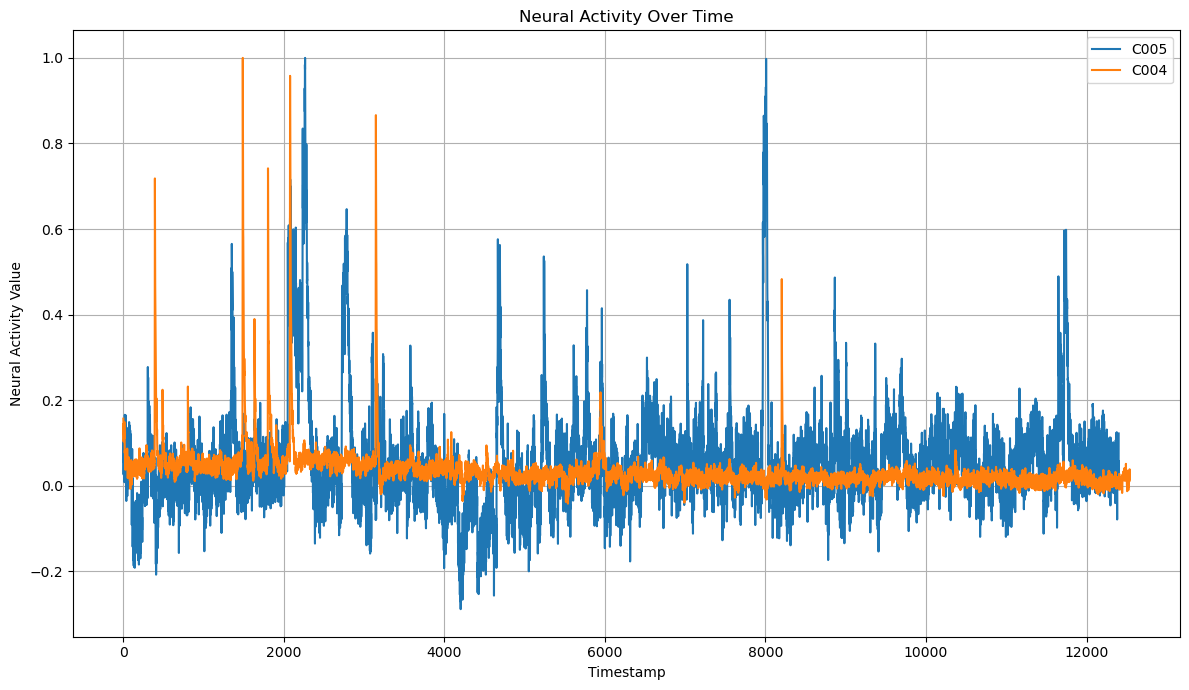

In [91]:
create_2_ani_line_plot(ani1_norm_data, ani2_norm_data, ['C005', 'C004'], 'test.png')

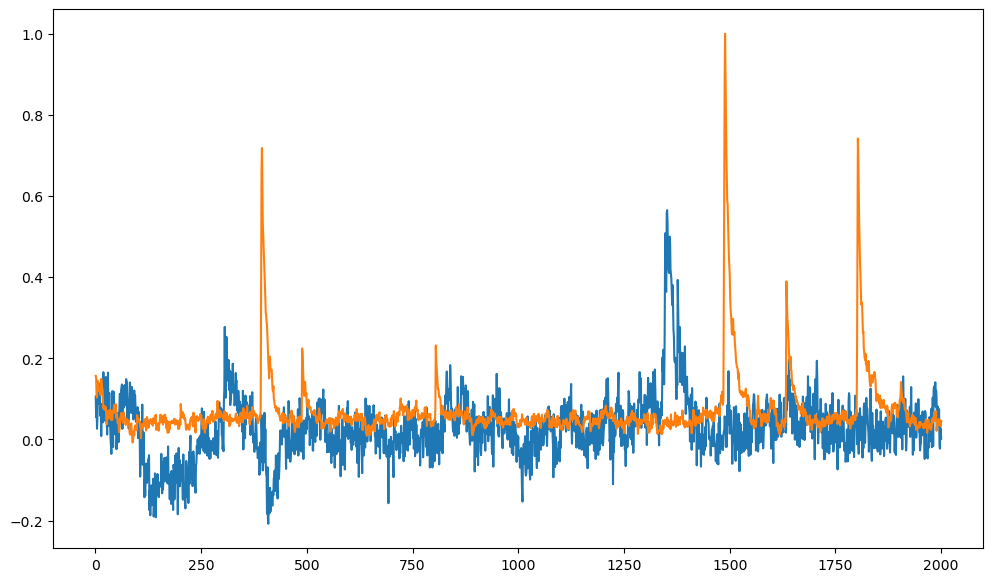

In [85]:
plt.figure(figsize=(12, 7))
timestamps1, values1 = zip(*(ani1_norm_data.get_data_for_cell('C005')))

plt.plot(timestamps1[:2000], values1[:2000], label='C005')

timestamps2, values2 = zip(*(ani2_norm_data.get_data_for_cell('C004')))
plt.plot(timestamps2[:2000], values2[:2000], label='C004')